# <font color=orange> <center>CSCI 5901 - Process of Data Science - Assignment 1 </center>

### <font color=purple> <center> Team Members </center></font>
### <font color=purple> <center> Lan Chen (B00809814, lan.chen@dal.ca), Jamuna Loganath (B00811590, jamuna.loganath@dal.ca)</center>

## <font color=blue> Part 1 Introduction. (2 marks total)

### a.Explain the dataset with your own words. Focus on the attributes description. (2 marks)

* <font color=#008000> The given dataset is Zomato restaurant's dataset. It has 51717 rows of data. It has the following attributes. 
 * <font color=#008000>   URL - denotes the uniform resource locator of the restaurant. 
 * <font color=#008000>   address - denotes the address of the restaurant.
 * <font color=#008000>   name  - denotes the name of the resturant.
 * <font color=#008000>   online_order - denotes whether online ordering facility is available in the restaurant or not. 
 * <font color=#008000>   book_table - denotes whether the table booking facilty is available or not.
 * <font color=#008000>   rate - denotes the rating of the restaurant out of 5.
 * <font color=#008000>   votes - denotes the number of votes made for the restaurant.
 * <font color=#008000>   phone - denotes the phone number of the restaurant.
 * <font color=#008000>   location - denotes the location of the restaurant.
 * <font color=#008000>   rest_type - denotes the restaurant type.
 * <font color=#008000>   dish_liked - denotes the dish that is  most liked by people in the restaurant.
 * <font color=#008000>   cuisines - denotes the cuisines available in the restaurant. 
 * <font color=#008000>   approx_cost(for two people) - denotes the approximate cost to be spend when two people visit the restautant. 
 * <font color=#008000>   reviews_list - denotes the review given by the customers. 
 * <font color=#008000>   menu- denotes the menu items of the restaurants. 
 * <font color=#008000>   listed_in(type) - denotes the type of food delivery mode of the restaurant like delivery, dine out, cafe, etc., 
 * <font color=#008000>   listed_in(city) - denotes the city of the restaurant. 


## <font color=blue> Part 2. Data pre-processing and understanding. (28 marks total)

### a. Load the data. (3 marks)

In [86]:
# importing necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from decimal import Decimal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
#from skrebate import ReliefF
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
# read data from csv file
data = pd.read_csv('zomato.csv')


 * <font color=#008000> The data is loaded successfully. 

In [18]:
# loading the first data three rows 
data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [20]:
# to get information about the dataframe including the data types of each column and memory usage of the entire data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

### b. Explore the data. Plot the distribution of the attributes (frequency). What trends can you find in your data? Are there attributes that are useless at this point? (10 marks)

* <font color=#008000> The dataset has many attributes. Out of which only few attributes are chosen for plotting and analysis. Attributes such as listed_in(city),rating, listed_in(type), approx_cost(two people), votes, location are plotted below and the same is analyzed for understanding the trend.

In [3]:
# check unique values for every columns
for c in data.columns:
    print(c,data[c].nunique(),sep='---')

url---51717
address---11495
name---8792
online_order---2
book_table---2
rate---64
votes---2328
phone---14926
location---93
rest_type---93
dish_liked---5271
cuisines---2723
approx_cost(for two people)---70
reviews_list---22513
menu_item---9098
listed_in(type)---7
listed_in(city)---30


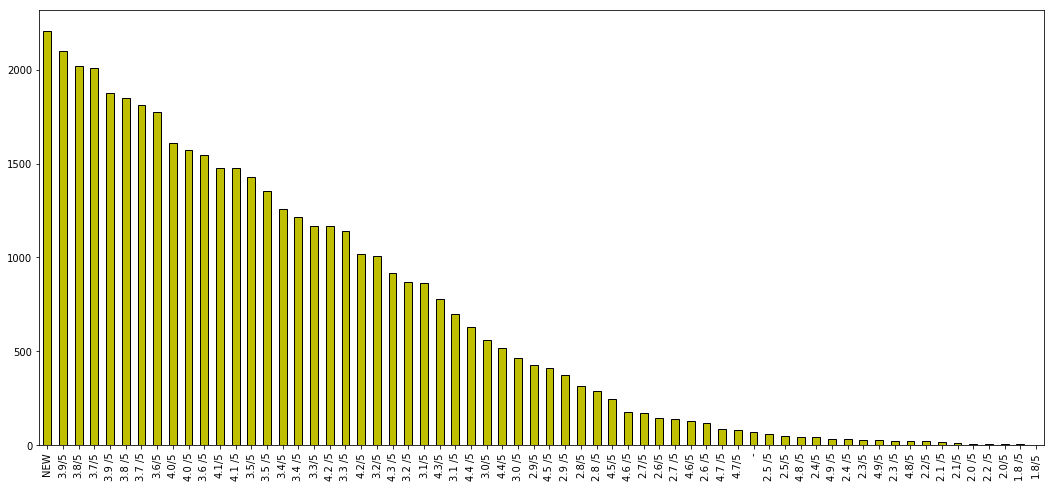

In [7]:
# plot histogram for column rating [1]
# refer to https://matplotlib.org/gallery/statistics/histogram_features.html
fig, ax = plt.subplots(figsize=(18,8))
data['rate'].value_counts().plot.bar(color='y',ec='black')

* <font color=#008000> The above chart shows the rating distribution of the restaurants. X-axis denotes the rating categories and y axis specifies the count of the specific rating. The plotting is done before cleaning the data. So, the corrupt data (rating) NEW is depicted as the majority one. Apart from that,  It is clearly seen from the graph that 3.9 rating is the rating given by most of the people(roughly more than 2000 customers). And, 1.8 is the least rating given to the restaurants. 

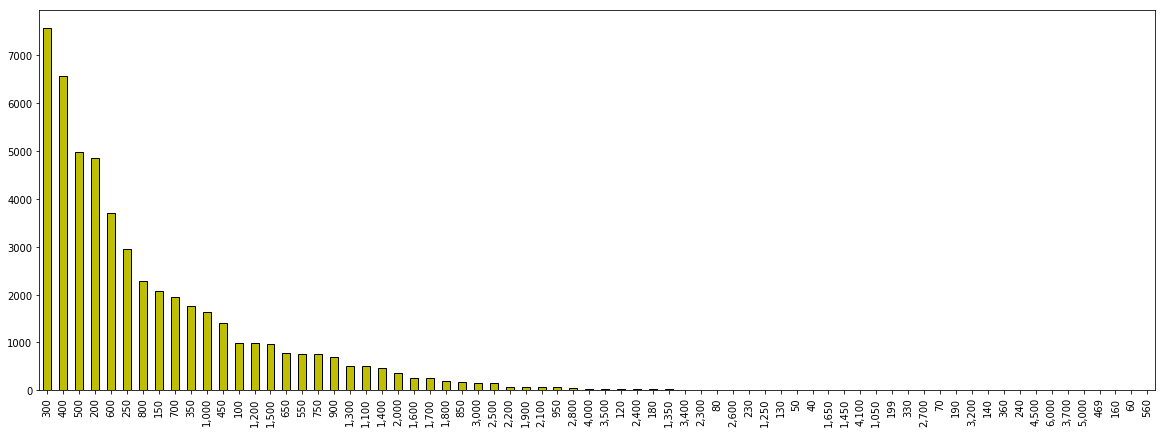

In [22]:
# Plotting for approximate cost for two people 
fig, ax = plt.subplots(figsize=(20,7))
data['approx_cost(for two people)'].value_counts().plot.bar(color='y',ec='black')

* <font color=#008000> The above graph represents the approximate cost need by two people to eat in the restaurant. x-axis denotes the approximate amount and y-axis denotes the number of restaurants. It is interpreted from the graph that 300 rupees is the approximate amount required by more than 7500 restaurants. 400 rupees is the approximate cost required in more than 6500 restaurants. The least number of restaurants require 1350 as the approximate cost. 

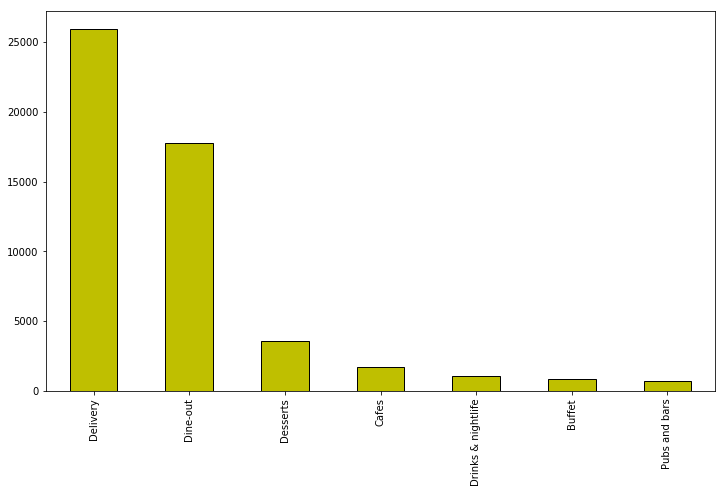

In [23]:
# plotting Listed_in (type) 
fig, ax = plt.subplots(figsize=(12,7))
data['listed_in(type)'].value_counts().plot.bar(color='y',ec='black')

* <font color=#008000> The graph above is plotting to represent the listed_in(type) of the restaurants. The x-axis denotes the listed_in type and y-axis denotes the number of restaurants. It is evident from the graph that Delivery listed_in type is the type used in majority of the restaurants. More than 25,000 restaurants use delivery type. The next major one is Dine-out. Pubs and Bars are shown towards the right end of the graph with the least number of restaurants. 

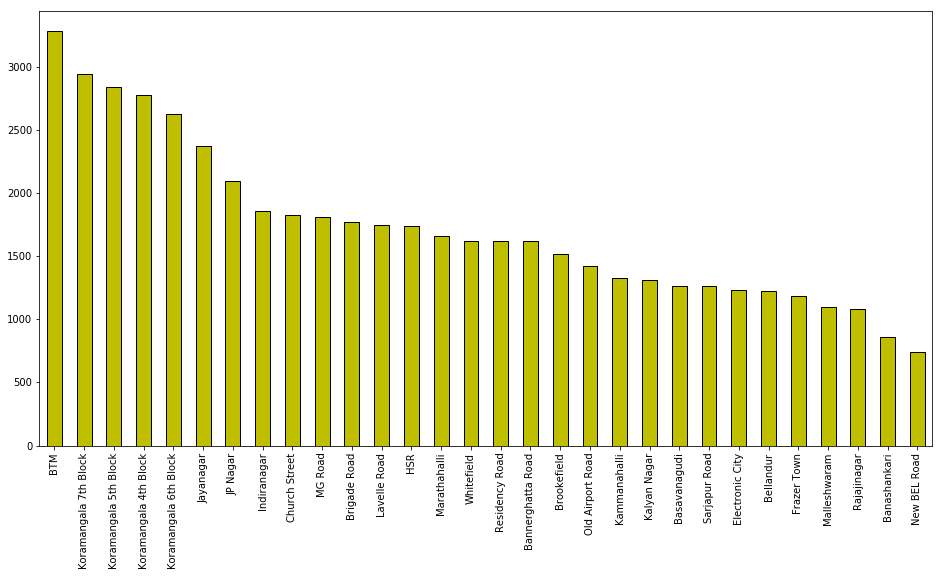

In [9]:
# plotting for listed_in(city)
fig, ax = plt.subplots(figsize=(16,8))
data['listed_in(city)'].value_counts().plot.bar(color='y',ec='black')

* <font color=#008000> The above graph is plotted to show the frequency of distribution of the listed_in(city) of the restaurants. The x-axis denotes the listed_in(city) and y-axis denotes the number of restaurants. It is noticed from the graph that BTM is the city with highest number of restaurants (roughly more than 3000). The next higher city is Koramangala 7th block. Down the lane, New BEL Road is the city with least number of restaurants (roughly less than 1000). 

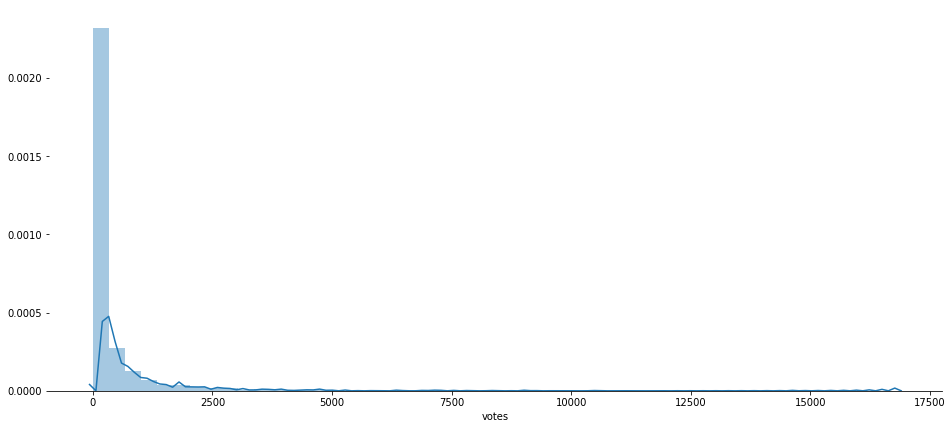

In [8]:
# plotting no of votes resturant using distplot and boxplot [2]
rest_rating = data.loc[data['votes'] > 0]
rest_rating = rest_rating['votes']

#f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)
fig, ax = plt.subplots(figsize=(16,7),sharex=True)
sns.despine(left=True)
sns.distplot(rest_rating)
#sns.boxplot(rest_rating, ax=axes[1])

* <font color=#008000> The above distplot shows the frequency distribution of number of votes of the restaurants. The x-axis denotes the number of restaurants and the y-axis denotes the frequency distribution of the votes of the restaurants.The graph shows that the number of votes is highly distributed for less than 2500 votes.  

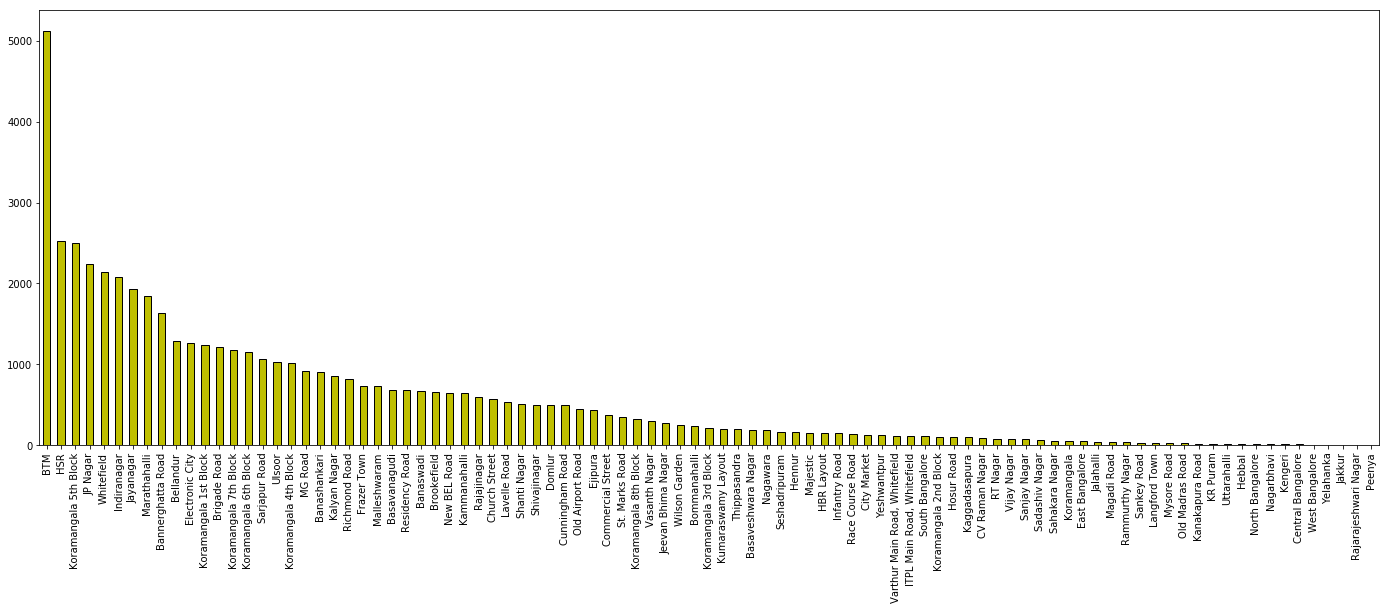

In [91]:
# Plotting for location
fig, ax = plt.subplots(figsize=(24,8))
data['location'].value_counts().plot.bar(color='y',ec='black')

* <font color=#008000> The above graph represents the various locations in which the restaurants are distributed. x-axis denotes the various locations and y-axis denotes the number of restaurants. It is interpreted from the graph that BTM is the location which has the most number of restaurants (roughly more than 5000 restaurants).  

### Are there attributes that are useless at this point?

* <font color=#008000> Yes, there are some attributes that are useless at this point. The URL, phone number, menu items, online_order, Book_table are some of the fields that are not useful.

### c. Are there restaurant duplicates in the data? Detect and if there is, clean it.

In [9]:
#findout the same restaurant [3]
data_duplicate = data[data.duplicated(['name','address'])]
data_duplicate

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
14,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Cafes,Banashankari
44,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Delivery,Banashankari
104,https://www.zomato.com/bangalore/cafe-nova-ban...,"101, Water Tank Road, 2nd Block, 3rd Stage, Ba...",CAFE NOVA,No,No,3.2/5,11,+91 8971090261,Banashankari,Cafe,NaN,"Cafe, Bakery",600,"[('Rated 1.0', ""RATED\n No ventilation. Smoke...",[],Delivery,Banashankari
193,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1/5,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Delivery,Banashankari
199,https://www.zomato.com/bangalore/the-vintage-c...,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",The Vintage Cafe,Yes,No,3.0/5,62,+91 9880016665\r\n+91 8217311687,Banashankari,Cafe,"Burgers, Caramel Milkshake, Iced Coffee, Iced Tea","Cafe, French, North Indian",400,"[('Rated 2.0', ""RATED\n This is a tiny cafÃ\...",[],Delivery,Banashankari
212,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Delivery,Banashankari
230,https://www.zomato.com/bangalore/srinathjis-ca...,"112, Bull Temple Road,next to more Basavanagud...",Srinathji's Cafe,No,No,3.8/5,148,080 26600704\r\n+91 9342593424,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550,"[('Rated 5.0', 'RATED\n No words for the pane...",[],Delivery,Banashankari
239,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Delivery,Banashankari
257,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Delivery,Banashankari
268,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6/5,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Delivery,Banashankari


* <font color=#008000> Yes, there are restaurant duplicates in the data. The duplicate restaurants are dropped using the following code. After dropping, the data is printed below. 

In [10]:
#Finding the unique restaurants 
data_duplicate['name'].unique()

array(['San Churro Cafe', 'Onesta', 'CAFE NOVA', ...,
       'Chime - Sheraton Grand Bengaluru Whitefield Hotel &...',
       'Vinod Bar And Restaurant', 'The Nest - The Den Bengaluru'],
      dtype=object)

In [11]:
# remove duplicated restaurants [4]
data_single = data.drop_duplicates(['name','address']) 

* <font color=#008000> The restaurant duplicates are successfully detected and removed from the dataset

In [12]:
# prints the data after removing the duplicates
data_single.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


### d. What is the neighborhood with the highest average rating? What are the major characteristics of this neighborhood (e.g., type of restaurant, type of food they offer, etc).

* <font color=#008000> To findout the neighbourhood with highest average rating, the rating field should be cleaned.  First finding out the unique data to understand the data clearly and to make sure the elements to be cleaned.

In [13]:
data_single['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '-',
       '3.6 /5', '4.8/5', '3.9 /5', '3.7 /5', '2.9 /5', '2.8 /5',
       '4.2 /5', '3.5 /5', '4.1 /5', '2.7 /5', '3.4 /5', '3.3 /5',
       '3.2 /5', '4.3 /5', '4.9/5', '2.1/5', '2.0/5', '4.4 /5', '4.5 /5',
       '1.8/5', '4.0 /5', '4.6 /5', '3.1 /5', '3.0 /5', '2.6 /5',
       '2.3 /5', '2.5 /5', '4.7 /5', '4.8 /5', '4.9 /5', '2.4 /5',
       '2.0 /5'], dtype=object)

In [14]:
#clean nan value for split. The nan values are replaced with '-'.
data_single['rate'].fillna('-', inplace=True)

C:\Users\lanch\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
data_single['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '-', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.6 /5', '4.8/5', '3.9 /5', '3.7 /5', '2.9 /5', '2.8 /5',
       '4.2 /5', '3.5 /5', '4.1 /5', '2.7 /5', '3.4 /5', '3.3 /5',
       '3.2 /5', '4.3 /5', '4.9/5', '2.1/5', '2.0/5', '4.4 /5', '4.5 /5',
       '1.8/5', '4.0 /5', '4.6 /5', '3.1 /5', '3.0 /5', '2.6 /5',
       '2.3 /5', '2.5 /5', '4.7 /5', '4.8 /5', '4.9 /5', '2.4 /5',
       '2.0 /5'], dtype=object)

In [16]:
# Removing '/5' from the data
data_single['rate']=data_single['rate'].apply(lambda x: x.split('/')[0])

C:\Users\lanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
data_single['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', '-',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.6 ', '4.8', '3.9 ', '3.7 ', '2.9 ', '2.8 ', '4.2 ',
       '3.5 ', '4.1 ', '2.7 ', '3.4 ', '3.3 ', '3.2 ', '4.3 ', '4.9',
       '2.1', '2.0', '4.4 ', '4.5 ', '1.8', '4.0 ', '4.6 ', '3.1 ',
       '3.0 ', '2.6 ', '2.3 ', '2.5 ', '4.7 ', '4.8 ', '4.9 ', '2.4 ',
       '2.0 '], dtype=object)

In [18]:
# change value of rate is'NEW' to 0 for further proceed
# data_single[data_single['rate']=='NEW'] = 0
data_single['rate'].values[data_single['rate'].values =='NEW'] = 0

In [19]:
data_single['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '-',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.6 ', '4.8', '3.9 ', '3.7 ', '2.9 ', '2.8 ', '4.2 ',
       '3.5 ', '4.1 ', '2.7 ', '3.4 ', '3.3 ', '3.2 ', '4.3 ', '4.9',
       '2.1', '2.0', '4.4 ', '4.5 ', '1.8', '4.0 ', '4.6 ', '3.1 ',
       '3.0 ', '2.6 ', '2.3 ', '2.5 ', '4.7 ', '4.8 ', '4.9 ', '2.4 ',
       '2.0 '], dtype=object)

In [20]:
# change value of rate is'-' to 0 for further proceed
# data_single[data_single['rate']=='-'] = 0
data_single['rate'].values[data_single['rate'].values =='-'] = 0

In [21]:
data_single['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.6 ', '4.8', '3.9 ', '3.7 ', '2.9 ', '2.8 ', '4.2 ', '3.5 ',
       '4.1 ', '2.7 ', '3.4 ', '3.3 ', '3.2 ', '4.3 ', '4.9', '2.1',
       '2.0', '4.4 ', '4.5 ', '1.8', '4.0 ', '4.6 ', '3.1 ', '3.0 ',
       '2.6 ', '2.3 ', '2.5 ', '4.7 ', '4.8 ', '4.9 ', '2.4 ', '2.0 '],
      dtype=object)

In [22]:
data_single.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [23]:
# float values
data_single['rate'] = data_single['rate'].apply(lambda x : float(x))

C:\Users\lanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
data_single.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [25]:
data_single['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [26]:
np.mean(data_single['rate'])

2.702312184974807

In [27]:
# change the 0 value to mean value of the rate
data_single['rate'].values[data_single['rate'].values ==0] = round(np.mean(data_single['rate']),1)

In [28]:
data_single['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.7, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [29]:
data_single.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [30]:
# Groupingup the neighbourhood [6]
neibor=data_single[['rate','location']].groupby('location').mean()

In [31]:
# displaying the neighbour in descending order based on the mean value calculated.
neibor.sort_values(by=['rate'],ascending=False)

,rate
location,
Lavelle Road,3.975000
Sankey Road,3.938462
St. Marks Road,3.894286
Rajarajeshwari Nagar,3.850000
Church Street,3.835088
Race Course Road,3.823333
Koramangala 5th Block,3.787313
Koramangala 3rd Block,3.713043
Kengeri,3.700000


* <font color=#008000> From the above output, it is noted that Lavelle Road	neighbourhood has the highest average rating . The rating is 3.975000

In [32]:
highestneigbor = data_single[data_single['location'] == 'Lavelle Road']

In [33]:
#Displaying the Lavelle Road rows
highestneigbor

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4981,https://www.zomato.com/bangalore/jw-kitchen-jw...,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",JW Kitchen - JW Marriott Bengaluru,No,Yes,4.4,2111,080 49652886,Lavelle Road,Fine Dining,"Pasta, Breakfast Buffet, Lasagne, Salads, Choc...","North Indian, Continental, Italian","2,200","[('Rated 5.0', 'RATED\n Great buffet spread\n...",[],Buffet,Brigade Road
4987,https://www.zomato.com/bangalore/rasovara-lave...,"Level 2, The Collection, UB City, Vithal Mally...",Rasovara,Yes,Yes,4.3,763,080 41738968\r\n+91 9886060965,Lavelle Road,Casual Dining,"Thali, Aamras, Malpua, Lassi, Plain Rice, Butt...","Rajasthani, North Indian","1,400","[('Rated 5.0', 'RATED\n We went to Rasovara o...",[],Buffet,Brigade Road
4994,https://www.zomato.com/bangalore/the-spice-baz...,"40/2, Lavelle Road, Bangalore",The Spice Bazaar,No,Yes,4.2,347,080 49652116,Lavelle Road,"Casual Dining, Bar","Brownie, Badam Halwa, Mutton Seekh, Salads, Ra...","North Indian, Mughlai","1,000","[('Rated 4.0', ""RATED\n We went for team lunc...",[],Buffet,Brigade Road
4995,https://www.zomato.com/bangalore/bbqd-global-g...,"Level 2, Concorde Block, UB City, Vittal Malya...",BBQ'D - Global Grill & Brewery,No,No,4.3,471,NaN,Lavelle Road,"Casual Dining, Microbrewery","Butter Chicken, Chaat, Dahipuri, Beer, Jalebi,...","BBQ, North Indian","1,500","[('Rated 4.0', 'RATED\n Yet another live barb...",[],Buffet,Brigade Road
5001,https://www.zomato.com/bangalore/cafe-mangii-l...,"204/A, Comet Block, UB City, Vittal Mallya Roa...",Cafe Mangii,Yes,Yes,4.3,1048,+91 8022270098,Lavelle Road,Casual Dining,"Pasta, Mocktails, Tiramisu, Sangria, Mousse, M...","Italian, Continental, Pizza","1,600","[('Rated 4.0', 'RATED\n The place at UB city ...",[],Buffet,Brigade Road
5009,https://www.zomato.com/bangalore/south-parade-...,"The Chancery Hotel, Lavelle Road, Bangalore",South Parade - The Chancery Hotel,No,No,3.1,120,+91 9972976627\r\n080 22276767,Lavelle Road,"Casual Dining, Bar","Breakfast Buffet, Salads","North Indian, Continental, Chinese","1,200","[('Rated 3.0', 'RATED\n Buffet spread was eno...",[],Buffet,Brigade Road
5048,https://www.zomato.com/bangalore/glens-bakehou...,"24/1, Lavelle Road, Bangalore",Glen's Bakehouse,Yes,No,4.4,1084,080 41124894\r\n080 41126825,Lavelle Road,"Bakery, Cafe","Pizza, Coffee, Pasta, Tiramisu, Cheesecake, Ho...","Bakery, Cafe, Italian, Desserts",600,"[('Rated 4.0', 'RATED\n Glen\'s bakehouse- as...","['Cheesy Chicken Bake', 'Barbecue Chicken Fron...",Cafes,Brigade Road
5051,https://www.zomato.com/bangalore/bengaluru-bak...,"JW Marriott Bengaluru, 24/1, Vittal Mallya Roa...",Bengaluru Baking Company - JW Marriott Bengaluru,No,No,4.3,521,+91 9900244769\r\n080 67188511,Lavelle Road,"Bakery, Cafe","Coffee, Fruit Tart, Croissants, Eclair, Sandwi...","Salad, Bakery, Cafe, Sandwich, Italian, Burger","1,400","[('Rated 5.0', 'RATED\n For some rich creamy ...",[],Cafes,Brigade Road
5070,https://www.zomato.com/bangalore/the-blackboar...,"40/2, Sri ML Subbaraju Road, Shantalanagar, Sa...",The Blackboard Bakery,No,Yes,3.7,91,+91 9986706451,Lavelle Road,"Cafe, Bakery","Pancakes, Sandwich, Salad, Coffee, Burgers","Cafe, Bakery, Continental","1,000","[('Rated 1.0', ""RATED\n This place has got to...",[],Cafes,Brigade Road
5073,https://www.zomato.com/bangalore/fresh-presser...,"4, Good Earth Store, Former Cinnamon Building,...",Fresh Pressery Cafe,No,No,4.1,104,+91 8041474546,Lavelle Road,"Cafe, Quick Bites","Salads, Sandwiches, Arugula Salad, Pasta, Avoc...","Cafe, Italian, Healthy Food","1,200","[('Rated 1.0', 'RATED\n The food is not fresh...",[],Cafes,Brigade Road


### What are the major characteristics of this neighborhood?

* <font color=#008000> The major characteristics of the neighborhood (Lavelle road) include cuisines, dish_liked, rest_type. 

In [34]:
#characteristics of heighest neighbour - cuisines
highestneigborCuisines = []
highestneigbor['cuisines'].apply(lambda x : highestneigborCuisines.extend(x.split(',')))

cusisinesPd = pd.DataFrame(highestneigborCuisines, columns =['cuisines'])
cusisinesPd = cusisinesPd['cuisines'].apply(lambda x : x.strip())

cusisinesPd.value_counts()

Italian          14
Continental      12
North Indian     12
Desserts         11
Salad             7
Cafe              7
Asian             6
Bakery            6
Chinese           6
Japanese          4
Seafood           4
European          4
Thai              4
Ice Cream         3
Mediterranean     3
Fast Food         3
Pizza             3
American          2
South Indian      2
Mughlai           2
Beverages         2
Steak             2
Momos             2
BBQ               2
Spanish           2
French            2
Healthy Food      2
Finger Food       2
Tex-Mex           1
Mangalorean       1
Burger            1
Mexican           1
Indonesian        1
Sandwich          1
North Eastern     1
Modern Indian     1
Juices            1
Kebab             1
Street Food       1
Parsi             1
Rajasthani        1
Name: cuisines, dtype: int64

* <font color=#008000> cusine is one of the important characteristics of the highest average rating neighbourhood. From the above results, Italian cuisine is the cuisine with the heighest value.

In [35]:
#characteristics of heighest neighbour - dish_liked
highestneigborDishLiked = []
highestneigbor['dish_liked'].apply(lambda x : highestneigborDishLiked.extend(str(x).split(',')))

dishLikedPd = pd.DataFrame(highestneigborDishLiked, columns =['dish_liked'])

dishLikedPd = dishLikedPd['dish_liked'].apply(lambda x : x.strip())
dishLikedPd.value_counts()

Cocktails               16
Salads                  12
Pizza                   11
Pasta                   11
nan                      9
Brownie                  8
Tiramisu                 7
Coffee                   6
Sangria                  5
Sandwiches               5
Mocktails                5
Burgers                  4
Martini                  4
Hot Chocolate            4
Nachos                   4
Sushi                    4
Beer                     3
Tempura Prawns           3
Chaat                    3
Sandwich                 3
Salad                    3
Momos                    3
Sea Food                 3
Breakfast Buffet         2
Dumplings                2
Cheesecake               2
Cappuccino               2
Lamb                     2
Idli                     2
Ramen                    2
                        ..
Badam Halwa              1
Miso Soup                1
Dahipuri                 1
Mushroom Pasta           1
Paratha                  1
Corn Sandwich            1
E

* <font color=#008000> dish_liked is another important characteristic of the highest average rating neighbourhood. From the above results, Cocktails are liked very much by the people in that neighbourhood.

In [36]:
#characteristics of heighest neighbour - rest_type
highestneigborRestType = []
highestneigbor['rest_type'].apply(lambda x : highestneigborRestType.extend(str(x).split(',')))

restTypesPd = pd.DataFrame(highestneigborRestType, columns =['rest_type'])

restTypesPd = restTypesPd['rest_type'].apply(lambda x : x.strip())
restTypesPd.value_counts()

Casual Dining     21
Bar               10
Fine Dining        7
Quick Bites        6
Bakery             6
Cafe               6
Dessert Parlor     5
Microbrewery       4
Lounge             4
Beverage Shop      2
Pub                2
Irani Cafee        1
Delivery           1
Confectionery      1
Kiosk              1
Name: rest_type, dtype: int64

* <font color=#008000> rest_type is another major characteristic of the highest average rating neighbourhood. From the above results, Casual dining is at the top with 21 restaurants in the neighbourhood. 

## <font color=blue>Part 3 Build the best model you can that forecasts the approximate cost of a meal for two people using the attributes location, rating, restaurant type, and cuisine. (70 marks total)</font>
### a. Explain what is the task you’re solving (e.g., supervised x unsupervised, classification x regression x clustering or similarity matching x etc). (5 marks) 


* <font color=#008000>It's supervised task, because the task has a target variable to predict.</font>
* <font color=#008000>It's regression problem, the task requires to predict some number of value.</font>

### b. What models will you choose? Why? (5 marks)

   * <font color=#008000>We will choose model of regression, because it requires predict a numerical number. We plan to choose SGDRegressor model from sklearn.linear_model module. </font>

### c. Which metrics will you use to evaluate your model? (5 marks) 
* <font color=#008000>The Regression metrics of sklearn.metrics we used are as below:</font>  
    <font color=#008000>1. mean_squared_error </font>  
    <font color=#008000>2. r2_score </font>
   

### d. How do you make sure not to overfit? (5 marks) 
* <font color=#008000>1. split the dataset into training data and testing data, using training data to fit the model, and using testing data to evaluate the performance</font>  
* <font color=#008000>2. compare the perfomance on training data with the performance on testing data, if the former is much better than the later, then there may be a overfitting in the model</font>
* <font color=#008000>3. use cross validation approach to select the best model with appropriate data split</font> 


### e. Build your model and verify how it performs (using the metrics you have chosen in Section 3(c)) in your training data. Justify which evaluation approach you are using?(Out of sample validation or Cross-validation). Use a plot to justify your findings. How good is your model? (10 marks). 

* <font color=#008000>Before building the model, there are some data preparationg task needed to be done, include:</font> 
* <font color=#008000>1. convert the string type of target variable to int type </font>     
* <font color=#008000>2. drop the missing value of the dataset for modeling </font>       
* <font color=#008000>3. convert the string type of the target variable(approx_cost(for two people)) to int type </font>     
* <font color=#008000>4. convert the categorical value type of the other variables to the binary value type</font>      



In [37]:
# change the nan value in the target variable
data_single['approx_cost(for two people)'].fillna('0', inplace=True)
data_single['approx_cost(for two people)'].unique()

C:\Users\lanch\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '0', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [38]:
# convert the string type of target variable to int type
data_single.loc[:,'approx_cost(for two people)'] =data_single['approx_cost(for two people)'].apply(lambda x : int(x.replace(',','')))

C:\Users\lanch\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
#using mean value to fill 0 value which is nan value before
data_single['approx_cost(for two people)'].values[data_single['approx_cost(for two people)'].values ==0] = round(np.mean(data_single['approx_cost(for two people)']),0)
data_single['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700,  485,
       1400,  180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000,
       2800, 3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,
         70, 3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000,
       3700, 1650, 2700, 4500,  140], dtype=int64)

In [40]:
# get the sub data of the original dataset for modeling
d = data_single[['location','rate','listed_in(type)','cuisines','approx_cost(for two people)']]

In [41]:
# check the row has missing value or nan value
d[d.isna().any(axis=1)]

,location,rate,listed_in(type),cuisines,approx_cost(for two people)
438,Banashankari,2.7,Delivery,NaN,150
440,Kumaraswamy Layout,3.3,Delivery,NaN,100
1662,NaN,2.7,Delivery,NaN,485
4037,Marathahalli,2.7,Delivery,NaN,200
6887,Whitefield,3.6,Delivery,NaN,400
6897,Whitefield,2.7,Delivery,NaN,400
7277,Whitefield,2.7,Delivery,NaN,400
7555,Marathahalli,2.7,Delivery,NaN,500
13591,Electronic City,2.7,Delivery,NaN,500
13693,NaN,2.7,Delivery,NaN,485


In [42]:
#drop all the nan value in the sub-data
d.dropna(inplace=True)

C:\Users\lanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
d.head(5)

,location,rate,listed_in(type),cuisines,approx_cost(for two people)
0,Banashankari,4.1,Buffet,"North Indian, Mughlai, Chinese",800
1,Banashankari,4.1,Buffet,"Chinese, North Indian, Thai",800
2,Banashankari,3.8,Buffet,"Cafe, Mexican, Italian",800
3,Banashankari,3.7,Buffet,"South Indian, North Indian",300
4,Basavanagudi,3.8,Buffet,"North Indian, Rajasthani",600


In [44]:
# check the values of each features of dataset
d['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima

In [45]:
d['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.7, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [46]:
d['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [47]:
d['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700,  485,
       1400,  180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000,
       2800, 3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,
         70, 3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000,
       3700, 1650, 2700, 4500,  140], dtype=int64)

In [48]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12480 entries, 0 to 51714
Data columns (total 5 columns):
location                       12480 non-null object
rate                           12480 non-null float64
listed_in(type)                12480 non-null object
cuisines                       12480 non-null object
approx_cost(for two people)    12480 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 585.0+ KB


In [49]:
# convert categorial value of cuisines to binary value
# refer to https://datascience.stackexchange.com/questions/14847/multiple-categorical-values-for-a-single-feature-how-to-convert-them-to-binary-u
cuisines = d['cuisines']

In [50]:
cleaned_cuisine = cuisines.str.split(',', expand=True).stack()
cuisine_binary =pd.get_dummies(cleaned_cuisine, prefix='cuisine_').groupby(level=0).sum()
cuisine_binary.head(5)

,cuisine__ Afghan,cuisine__ Afghani,cuisine__ African,cuisine__ American,cuisine__ Andhra,cuisine__ Arabian,cuisine__ Asian,cuisine__ Assamese,cuisine__ Awadhi,cuisine__ BBQ,...,cuisine__Spanish,cuisine__Steak,cuisine__Street Food,cuisine__Sushi,cuisine__Tamil,cuisine__Tea,cuisine__Thai,cuisine__Tibetan,cuisine__Turkish,cuisine__Vietnamese
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# convert the categorial value of location, rate, list_in(type) to binary value 
convert_other = d[['location','rate','listed_in(type)']]
data_dummies = pd.get_dummies(convert_other, prefix_sep='_', drop_first=True)

In [52]:
data_dummies.head(5)

,rate,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,location_Bellandur,location_Bommanahalli,location_Brigade Road,location_Brookefield,...,location_Whitefield,location_Wilson Garden,location_Yelahanka,location_Yeshwantpur,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,4.1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# the features used to predict
X= data_dummies.join(cuisine_binary)

In [55]:
#target variable
y = d['approx_cost(for two people)']
y.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700,  485,
       1400,  180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000,
       2800, 3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,
         70, 3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000,
       3700, 1650, 2700, 4500,  140], dtype=int64)

 ### * Build the model and verify how it performs in your training data.
 #### * <font color=#008000>We used cross validation for evaluation, so we evaluate the performances of training data and testing data at the same time</font>
 #### * <font color=#008000>In this assignment, we evaluate 3 regression models. They are LinearRegression, SGDRegressor, Lasso,MLPRegressor </font>

### <font color=blue>Model 1.  LinearRegression</font>

In [79]:
#Build the Model LinearRegression

lm = LinearRegression()
# using r2 score and squred error to evaluate performance using cross validation
# refer to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
train_r2 = [];
train_error = [];
test_r2 = [];
test_error = [];


# using cross validation

kf = KFold(n_splits=5)        
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   
    lm.fit(X_train,y_train)
    train_prediction = lm.predict(X_train)
    test_prediction = lm.predict(X_test)
    
    #using metrics to evaluate the performance on training data for every fold
    train_r2.append(metrics.r2_score(y_train, train_prediction))
    train_error.append(metrics.mean_squared_error(y_train, train_prediction))
    #using metrics to evaluate the performance on testing data for every fold
    test_r2.append(metrics.r2_score(y_test, test_prediction))
    test_error.append(metrics.mean_squared_error(y_test, test_prediction))

# caculate the mean metrics for the whole data set
mean_train_r2 = np.mean(train_r2)
mean_train_error = np.mean(train_error)
mean_test_r2 = np.mean(test_r2)
mean_test_error = np.mean(test_error)


In [68]:

print("traing data r2 score: ", train_r2)
print("testing data r2 score: ",test_r2)
print("training data squared error:", train_error)
print("testing data squared error:",test_error)


print("average traing data r2 score: ", mean_train_r2)
print("average testing data r2 score: ",mean_test_r2)
print("average training data squared error:", mean_train_error)
print("average data squared error:",mean_test_error)

traing data r2 score:  [0.576547470009755, 0.5624233009002436, 0.583238094884868, 0.581518871962628, 0.5771008983104057]
testing data r2 score:  [-1.7134422488276775e+24, -7.26378139920943e+17, -1.4888522869283098e+20, -2.6384223979339045e+20, -4.4380083000096615e+22]
training data squared error: [72044.09560691394, 53944.69660005979, 69076.05818961217, 65936.11228199494, 60734.09500688773]
testing data squared error: [1.3306526373945704e+29, 1.861988809773212e+23, 1.4373926651018725e+25, 3.447118864039168e+25, 8.285703980248071e+27]
average traing data r2 score:  0.5761657272135801
average testing data r2 score:  -3.516471571348801e+23
average training data squared error: 64347.01153709371
average data squared error: 2.82799998067755e+28


{'whiskers': [<matplotlib.lines.Line2D at 0x18f44f8d7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x18f44f8deb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f44f8d6a0>,
 'medians': [<matplotlib.lines.Line2D at 0x18f44f96588>,
 'fliers': [<matplotlib.lines.Line2D at 0x18f44f968d0>,
 'means': []}

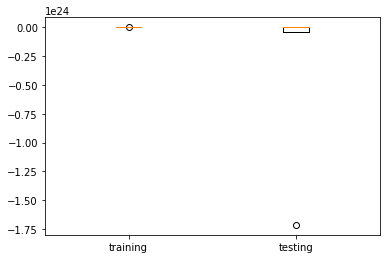

In [80]:
plt.boxplot([train_r2,test_r2],labels=['training','testing'])

 ### * <font color=#008000> Based on metrics of LinearRegression performance, we can say that the it's performance on training data is much better than the testing data. We assumed that there is an overfitting for this model.</font>

### <font color=blue>Model 2.  MLPRegressor</font>

In [74]:
#Build the Model MLPRegressor

mlpr = MLPRegressor()
# using r2 score and squred error to evaluate performance using cross validation
# refer to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
train_r2 = [];
train_error = [];
test_r2 = [];
test_error = [];


# using cross validation

kf = KFold(n_splits=5)        
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   
    mlpr.fit(X_train,y_train)
    train_prediction = mlpr.predict(X_train)
    test_prediction = mlpr.predict(X_test)
    
    #using metrics to evaluate the performance on training data for every fold
    train_r2.append(metrics.r2_score(y_train, train_prediction))
    train_error.append(metrics.mean_squared_error(y_train, train_prediction))
    #using metrics to evaluate the performance on testing data for every fold
    test_r2.append(metrics.r2_score(y_test, test_prediction))
    test_error.append(metrics.mean_squared_error(y_test, test_prediction))

# caculate the mean metrics for the whole data set
mean_train_r2 = np.mean(train_r2)
mean_train_error = np.mean(train_error)
mean_test_r2 = np.mean(test_r2)
mean_test_error = np.mean(test_error)


C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [75]:

print("traing data r2 score: ", train_r2)
print("testing data r2 score: ",test_r2)
print("training data squared error:", train_error)
print("testing data squared error:",test_error)


print("average traing data r2 score: ", mean_train_r2)
print("average testing data r2 score: ",mean_test_r2)
print("average training data squared error:", mean_train_error)
print("average data squared error:",mean_test_error)

traing data r2 score:  [0.5855485790987653, 0.5754192041977684, 0.5951018347150335, 0.5901527408530682, 0.5976621509058775]
testing data r2 score:  [0.33419008967814545, 0.5284880868377927, 0.42465989655416936, 0.47283116158363514, 0.45994844439535987]
training data squared error: [70512.69192444716, 52342.5544798989, 67109.70672419082, 64575.75524210174, 57781.21791728211]
testing data squared error: [51706.54066569127, 120866.7851813853, 55545.44610588426, 68875.00837097544, 100826.92553330258]
average traing data r2 score:  0.5887769019541027
average testing data r2 score:  0.44402353580982046
average training data squared error: 62464.385257584145
average data squared error: 79564.14117144777


{'whiskers': [<matplotlib.lines.Line2D at 0x18f44ecb128>,
 'caps': [<matplotlib.lines.Line2D at 0x18f44ecb7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f44ec2f98>,
 'medians': [<matplotlib.lines.Line2D at 0x18f44ecbe10>,
 'fliers': [<matplotlib.lines.Line2D at 0x18f44ed6198>,
 'means': []}

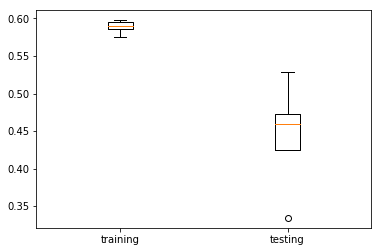

In [77]:
plt.boxplot([train_r2,test_r2],labels=['training','testing'])

 ### * <font color=#008000> On comparing the results of MLPRegressor algorithm's both train data and test data  with Linear regression, MLP performs better. In MLP, training data performs better than the testing data. </font>

### <font color=blue>Model 3.  SGDRegressor</font>

In [81]:
#Build the Model SGDRegressor

sgd = SGDRegressor()
# using r2 score and squred error to evaluate performance using cross validation
# refer to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
train_r2 = [];
train_error = [];
test_r2 = [];
test_error = [];


# using cross validation

kf = KFold(n_splits=5)        
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   
    sgd.fit(X_train,y_train)
    train_prediction = sgd.predict(X_train)
    test_prediction = sgd.predict(X_test)
    
    #using metrics to evaluate the performance on training data for every fold
    train_r2.append(metrics.r2_score(y_train, train_prediction))
    train_error.append(metrics.mean_squared_error(y_train, train_prediction))
    #using metrics to evaluate the performance on testing data for every fold
    test_r2.append(metrics.r2_score(y_test, test_prediction))
    test_error.append(metrics.mean_squared_error(y_test, test_prediction))

# caculate the mean metrics for the whole data set
mean_train_r2 = np.mean(train_r2)
mean_train_error = np.mean(train_error)
mean_test_r2 = np.mean(test_r2)
mean_test_error = np.mean(test_error)


In [82]:

print("traing data r2 score: ", train_r2)
print("testing data r2 score: ",test_r2)
print("training data squared error:", train_error)
print("testing data squared error:",test_error)


print("average traing data r2 score: ", mean_train_r2)
print("average testing data r2 score: ",mean_test_r2)
print("average training data squared error:", mean_train_error)
print("average data squared error:",mean_test_error)

traing data r2 score:  [0.5519497877092996, 0.5321755932213357, 0.5604301603384781, 0.5534192707970912, 0.5522057651368331]
testing data r2 score:  [0.44457704752519855, 0.4747657015988265, 0.4566027916125488, 0.47248061278172726, 0.45753462648325194]
training data squared error: [76229.02225123774, 57673.650671295654, 72856.35143276754, 70363.500599885, 64309.37662212905]
testing data squared error: [43133.93212322985, 134637.91548552245, 52461.561729835055, 68920.80783768589, 101277.58220922414]
average traing data r2 score:  0.5500361154406075
average testing data r2 score:  0.4611921560003106
average training data squared error: 68286.380315463
average data squared error: 80086.35987709947


{'whiskers': [<matplotlib.lines.Line2D at 0x18f44ffa4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x18f44ffab70>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f44ffa358>,
 'medians': [<matplotlib.lines.Line2D at 0x18f45004240>,
 'fliers': [<matplotlib.lines.Line2D at 0x18f45004588>,
 'means': []}

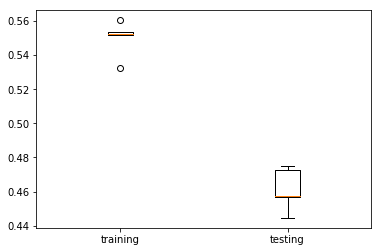

In [83]:
plt.boxplot([train_r2,test_r2],labels=['training','testing'])

 ### * <font color=#008000>Comparing the results of SGDRegressor with Linear regression and MLPRegressor, SGDRegressor performs best on unseen data. But MLPRegressor performs best on training data. </font>

 

 ### * g. Can you tune your model to perform better? Explain the technique you’re using and justify why it is improving your results. (25 marks)

#### * <font color=#008000>Comparing these 3 models, SGDRegressor and MLPRegressor have better performance. So we are going to tune these two models to select the best model for this task.</font>

### <font color=blue> Tune model SGDRegressor</font>

In [ ]:

parameters = {'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'],'max_iter':[1000,2000,4000],'tol':[0.001, 0.0005,0.005],'learning_rate':['constant','optimal','invscaling','adaptive']}
tune_sgd= GridSearchCV(sgd, parameters, cv=5)
tune_sgd.fit(X, y)

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

In [ ]:
tune_sgd.best_score_

In [ ]:
tune_sgd.best_estimator_

In [ ]:
tune_sgd.best_params_

In [ ]:
# using the best estimator to make a better performance
sgd_better = SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
train_r2 = [];
train_error = [];
test_r2 = [];
test_error = [];


# validate new model performance


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   
    sgd_better.fit(X_train,y_train)
    train_prediction = sgd_better.predict(X_train)
    test_prediction = sgd_better.predict(X_test)
    
    #using metrics to evaluate the performance on training data for every fold
    train_r2.append(metrics.r2_score(y_train, train_prediction))
    train_error.append(metrics.mean_squared_error(y_train, train_prediction))
    #using metrics to evaluate the performance on testing data for every fold
    test_r2.append(metrics.r2_score(y_test, test_prediction))
    test_error.append(metrics.mean_squared_error(y_test, test_prediction))

# caculate the mean metrics for the whole data set
sgd_mean_train_r2 = np.mean(train_r2)
sgd_mean_train_error = np.mean(train_error)
sgd_mean_test_r2 = np.mean(test_r2)
sgd_mean_test_error = np.mean(test_error)

In [ ]:
print("traing data r2 score: ", train_r2)
print("testing data r2 score: ",test_r2)
print("training data squared error:", train_error)
print("testing data squared error:",test_error)


print("average traing data r2 score: ", mean_train_r2)
print("average testing data r2 score: ",mean_test_r2)
print("average training data squared error:", mean_train_error)
print("average data squared error:",mean_test_error)

In [ ]:
plt.boxplot([train_r2,test_r2],labels=['training','testing'])

### <font color=blue> Tune model MLPRegressor</font>

In [ ]:
parameters = {'hidden_layer_sizes':[50,100,200],'learning_rate':['constant','invscaling','adaptive']}
tune_mlp= GridSearchCV(mlpr, parameters, cv=5)
tune_mlp.fit(X, y)


In [ ]:
tune_mlp.best_score_

In [ ]:
tune_mlp.best_estimator_

In [ ]:
tune_mlp.best_params_

In [ ]:
# using the best estimator to make a better performance
mlp_better = MLPRegressor()

In [ ]:
train_r2 = [];
train_error = [];
test_r2 = [];
test_error = [];


# validate new model performance


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   
    mlp_better.fit(X_train,y_train)
    train_prediction = mlp_better.predict(X_train)
    test_prediction = mlp_better.predict(X_test)
    
    #using metrics to evaluate the performance on training data for every fold
    train_r2.append(metrics.r2_score(y_train, train_prediction))
    train_error.append(metrics.mean_squared_error(y_train, train_prediction))
    #using metrics to evaluate the performance on testing data for every fold
    test_r2.append(metrics.r2_score(y_test, test_prediction))
    test_error.append(metrics.mean_squared_error(y_test, test_prediction))

# caculate the mean metrics for the whole data set
mlp_mean_train_r2 = np.mean(train_r2)
mlp_mean_train_error = np.mean(train_error)
mlp_mean_test_r2 = np.mean(test_r2)
mlp_mean_test_error = np.mean(test_error)

In [ ]:
plt.boxplot([train_r2,test_r2],labels=['training','testing'])

In [71]:
#splict modeling data to train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [72]:
#build the model
sgd = SGDRegressor()
sgd.fit(X_train,y_train)

C:\Users\jamun\Anaconda1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

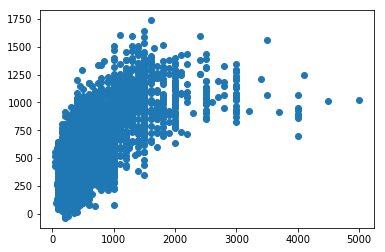

In [73]:
# performance on trainning data
# using cross-validation
train_predictions = sgd.predict(X_train)
plt.scatter(y_train,train_predictions)

C:\Users\jamun\Anaconda1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


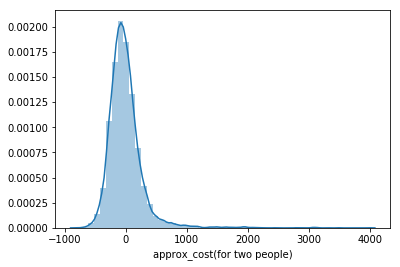

In [74]:
sns.distplot((y_train-train_predictions),bins=50);

### * <font color=#008000>This plot shows that the distribution of the difference between the real value and predicted value. The majority difference is 0, and then starts to increase. But most difference is within 400</font>  


In [75]:
# using cross validation to evaluate the model
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)        
kf.get_n_splits(X)


5

In [76]:
# using KFold cross validation to caculate the average metrics
train_r2 = [];
train_squred = [];

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    sgd.fit(X_train_cv,y_train_cv)
    train_predictions_cv = sgd.predict(X_test_cv)
    train_r2.append(metrics.r2_score(y_test_cv, train_predictions_cv))
    train_squred.append(metrics.mean_squared_error(y_test_cv, train_predictions_cv))
   


C:\Users\jamun\Anaconda1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [77]:
np.mean(train_r2)

0.42550905259109734

In [78]:
np.mean(train_squred)

88439.30936503738

###### * <font color=#008000>We used cross-validation approach for evaluation in this task. For traning data, the mean squared error of our model is 73622.4, the mean r2 score is 0.52. It means that using this model, we have 52% chance to predict unseen data correctly</font>  

### f. Test your model in your testing set and evaluate its performance. Use a plot to justify your findings. How is it performing compared to your training data? (15 marks)

In [79]:
# performance on testing data
# using cross validation
test_tetpredictions = sgd.predict(X_test)


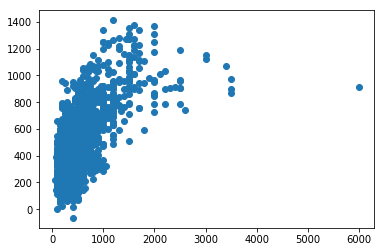

In [80]:
plt.scatter(y_test,test_tetpredictions)

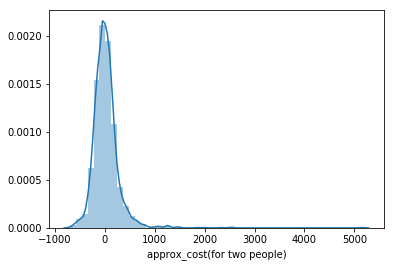

In [56]:
sns.distplot((y_test-test_tetpredictions),bins=50);

### * <font color=#008000>This plot shows that the distribution of the difference between the real value and predicted value. The majority difference is 0, and then starts to increase. But most difference is within 300</font>  


In [57]:
# using cross validation to evaluate the performance on test data
test_r2 = [];
test_squred = [];

for train_index, test_index in kf.split(X_test):
    X_train_cv, X_test_cv = X_test.iloc[train_index], X_test.iloc[test_index]
    
    y_train_cv, y_test_cv = y_test.iloc[train_index], y_test.iloc[test_index]
   
    sgd.fit(X_train_cv,y_train_cv)
    test_predictions_cv = sgd.predict(X_test_cv)
    test_r2.append(metrics.r2_score(y_test_cv, test_predictions_cv))
    test_squred.append(metrics.mean_squared_error(y_test_cv, test_predictions_cv))
   

In [58]:
np.mean(test_r2)

0.4252523271275379

In [59]:
np.mean(test_squred)

83823.46729211482

##### * <font color=#008000>For testing data, the mean squared error of our model is 83823.5, the mean r2 score is 0.43. Comparing to the performance of the training data, the performance of the testing data is not as good as training data. The r2 score is about 0.1 lower than the training data.</font>  

### g. Can you tune your model to perform better? Explain the technique you’re using and justify why it is improving your results. (25 marks) 

* <font color=#008000>we used GridSearchCV to tune our model in order to select the most appropriate values of parameters for the model building</font>



In [60]:
from sklearn.model_selection import GridSearchCV

In [711]:
# try the value of the patameters of the SGDRegressor() 
# to find a better performance model
parameters = {'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'],'max_iter':[1000,2000,4000],'tol':[0.001, 0.0005,0.005],'learning_rate':['constant','optimal','invscaling','adaptive']}
regressor = GridSearchCV(sgd, parameters, cv=5)
regressor.fit(X_train, y_train)

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, ver...0,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_loss', 'huber',
                                  'e

In [713]:
#clf.best_score_,clf.best_estimator_,clf.best_params_
regressor.best_score_

0.527651758241995

In [714]:
# best estimator
regressor.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [715]:
# best values for the choosing parameter
regressor.best_params_

{'learning_rate': 'adaptive',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'tol': 0.001}

In [717]:
# using the best estimator to make a better performance
sgd_better = SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [722]:
sgd_better.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [809]:
# using cross validation to evaluate the performance on test data
test_r2_better = [];
test_squred_better = [];

for train_index, test_index in kf.split(X_test):
    X_train_cv, X_test_cv = X_test.iloc[train_index], X_test.iloc[test_index]
    
    y_train_cv, y_test_cv = y_test.iloc[train_index], y_test.iloc[test_index]
   
    sgd_better.fit(X_train_cv,y_train_cv)
    test_predictions_cv = sgd_better.predict(X_test_cv)
    test_r2_better.append(metrics.r2_score(y_test_cv, test_predictions_cv))
    test_squred_better.append(metrics.mean_squared_error(y_test_cv, test_predictions_cv))
   

C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lanch\Anaconda3\lib\site-packag

In [810]:
np.mean(test_r2_better)

0.44610243918986

In [811]:
np.mean(test_squred_better)

80982.73316954712

## explain  why it is improving your results

### h. (Bonus)​ Use relief feature selection to improve your model.(10 marks) 

In [67]:
#X[X.isna().any(axis=1)]
y[y.isna()]

Series([], Name: approx_cost(for two people), dtype: int64)

In [73]:
#Step 6
#Bonus Task
#r = make_pipeline(ReliefF(n_features_to_select=10, n_neighbors=100),sgd)
# rf = ReliefF(n_features_to_select=10, n_neighbors=100);
fs = ReliefF()
fs.fit(X_train, y_train)

#cross_val_score(r, X, y,cv=5, scoring='r2',error_score='raise')
#r.fit(X_train,y_train)
#p = r.predict(X_test)
#metrics.r2_score(y_test, P)
#print(np.mean(cross_val_score(r, X, y)))

KeyError: 0

In [74]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.model_selection import train_test_split

genetic_data = pd.read_csv('https://github.com/EpistasisLab/scikit-rebate/raw/master/data/'
                           'GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.tsv.gz',
                           sep='\t', compression='gzip')

features, labels = genetic_data.drop('class', axis=1).values, genetic_data['class'].values

# Make sure to compute the feature importance scores from only your training set
X_train, X_test, y_train, y_test = train_test_split(features, labels)

fs = ReliefF()
fs.fit(X_train, y_train)

ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=1,
        n_neighbors=100, verbose=False)

In [77]:
features

array([[0, 0, 2, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 2, ..., 1, 1, 1]], dtype=int64)

In [78]:
X


,rate,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,location_Bellandur,location_Bommanahalli,location_Brigade Road,location_Brookefield,...,cuisine__Spanish,cuisine__Steak,cuisine__Street Food,cuisine__Sushi,cuisine__Tamil,cuisine__Tea,cuisine__Thai,cuisine__Tibetan,cuisine__Turkish,cuisine__Vietnamese
0,4.1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4.6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4.2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
genetic_data.head(5)

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N11,N12,N13,N14,N15,N16,N17,P1,P2,class
0,0,0,2,1,1,0,0,2,0,1,...,2,1,0,0,0,0,0,0,1,1
1,0,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,2,0,0,0,0,...,1,1,0,0,2,2,0,0,0,1
3,0,1,0,2,0,1,0,2,0,0,...,1,1,0,1,1,0,1,1,0,1
4,0,0,1,1,0,0,0,1,1,0,...,1,0,0,1,0,0,1,1,0,1


In [81]:
x1= X.values

In [82]:
x1

array([[4.1, 1. , 0. , ..., 0. , 0. , 0. ],
       [4.1, 1. , 0. , ..., 0. , 0. , 0. ],
       [3.8, 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [3.3, 0. , 0. , ..., 0. , 0. , 0. ],
       [2.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [2.7, 0. , 0. , ..., 0. , 0. , 0. ]])

In [83]:
y1=y.values

In [84]:
y1

array([ 800,  800,  800, ...,  350,  800, 2000], dtype=int64)

In [85]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1)

In [86]:
# feature importance ranking 
# using reliefF refer to https://epistasislab.github.io/scikit-rebate/using/
fs1 = ReliefF()
fs1.fit(X1_train, y1_train)

ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=1,
        n_neighbors=100, verbose=False)

In [88]:
fs1.top_features_

array([ 94,  96, 264, 124, 171, 126, 278, 226, 221, 187, 224, 130, 231,
        93,  19,  89, 145,  95, 115, 183, 195, 167, 127,  29,  27, 113,
       203, 210, 105, 267,  52, 176, 216,  45, 227,  56, 230, 108, 181,
       131,  98, 205,  70,  66,  22,  32, 103, 159,  36,   8, 190, 104,
        60, 151, 275, 160,  15,  55, 202, 229, 191, 129,   1,  51, 102,
         3, 120, 243, 260,  83,  54,   6,  28,  71,  77,   4,  12, 165,
       241, 209, 132, 254,  44, 140, 281,   5,  20,  23, 192,  14, 123,
       199, 211, 161, 148, 248,  75,   0,  90,  76, 257, 214, 234,  46,
       242,  62, 238,  58, 118, 144, 164,  31, 109, 258, 150, 255, 136,
        16,  81, 155, 146, 251, 110, 100, 174, 138,  87,  97, 280,  18,
       244, 279, 154,  68,  86,  63, 273, 153,  42, 237,  47, 204, 173,
       288, 128, 253,  50, 223, 245, 228, 232, 259, 284,  25,  26, 285,
       137,  43,   7,  38, 125, 277,  13, 268,  17, 201, 156, 200, 272,
       134, 208, 282, 152, 101, 252, 189, 225, 168, 186, 276, 23

In [91]:
features = [[]];
for feature_name, feature_score in zip(X.columns,fs1.feature_importances_):
    print(feature_name, '\t', feature_score)
    features.append([feature_name,feature_score])


rate 	 0.0018621564212392115
location_Banashankari 	 0.004186965811965751
location_Banaswadi 	 -0.00032692307692307654
location_Bannerghatta Road 	 0.0037670940170940227
location_Basavanagudi 	 0.003015041638405697
location_Basaveshwara Nagar 	 0.0023824786324786115
location_Bellandur 	 0.0032137305165838067
location_Bommanahalli 	 0.0001773504273504296
location_Brigade Road 	 0.0058815228553381815
location_Brookefield 	 -0.001753205128205123
location_CV Raman Nagar 	 -0.0019252136752136372
location_Central Bangalore 	 0.0
location_Church Street 	 0.002905982905982824
location_City Market 	 0.00010470085470085397
location_Commercial Street 	 0.002028846153846112
location_Cunningham Road 	 0.004683828662160434
location_Domlur 	 0.0008020972876585659
location_East Bangalore 	 8.012820512820509e-05
location_Ejipura 	 0.0005502136752136724
location_Electronic City 	 0.028029677911261836
location_Frazer Town 	 0.002252136752136728
location_HBR Layout 	 -0.0014380341880341743
location_HSR 	 

In [92]:
features

[[],
 ['rate', 0.0018621564212392115],
 ['location_Banashankari', 0.004186965811965751],
 ['location_Banaswadi', -0.00032692307692307654],
 ['location_Bannerghatta Road', 0.0037670940170940227],
 ['location_Basavanagudi', 0.003015041638405697],
 ['location_Basaveshwara Nagar', 0.0023824786324786115],
 ['location_Bellandur', 0.0032137305165838067],
 ['location_Bommanahalli', 0.0001773504273504296],
 ['location_Brigade Road', 0.0058815228553381815],
 ['location_Brookefield', -0.001753205128205123],
 ['location_CV Raman Nagar', -0.0019252136752136372],
 ['location_Central Bangalore', 0.0],
 ['location_Church Street', 0.002905982905982824],
 ['location_City Market', 0.00010470085470085397],
 ['location_Commercial Street', 0.002028846153846112],
 ['location_Cunningham Road', 0.004683828662160434],
 ['location_Domlur', 0.0008020972876585659],
 ['location_East Bangalore', 8.012820512820509e-05],
 ['location_Ejipura', 0.0005502136752136724],
 ['location_Electronic City', 0.028029677911261836],

In [93]:
feature_df = pd.DataFrame(data=features,index=features[:,0]) 

TypeError: list indices must be integers or slices, not tuple

In [106]:
feature_df = pd.DataFrame(data=features[1:]) 



In [107]:
feature_df


,0,1
0,rate,0.001862
1,location_Banashankari,0.004187
2,location_Banaswadi,-0.000327
3,location_Bannerghatta Road,0.003767
4,location_Basavanagudi,0.003015
5,location_Basaveshwara Nagar,0.002382
6,location_Bellandur,0.003214
7,location_Bommanahalli,0.000177
8,location_Brigade Road,0.005882
9,location_Brookefield,-0.001753


In [108]:
feature_df.set_index(0,inplace=True)

In [110]:
feature_df.columns = ['importance']

In [111]:
feature_df

,importance
0,
rate,0.001862
location_Banashankari,0.004187
location_Banaswadi,-0.000327
location_Bannerghatta Road,0.003767
location_Basavanagudi,0.003015
location_Basaveshwara Nagar,0.002382
location_Bellandur,0.003214
location_Bommanahalli,0.000177
location_Brigade Road,0.005882


In [112]:
feature_df.sort_values(by=['importance'],ascending=False,inplace=True)

In [113]:
feature_df


,importance
0,
listed_in(type)_Delivery,0.199881
listed_in(type)_Dine-out,0.151655
cuisine__North Indian,0.135023
cuisine__ Chinese,0.124197
cuisine__ North Indian,0.088851
cuisine__ Continental,0.068739
cuisine__South Indian,0.049933
cuisine__Continental,0.047720
cuisine__Cafe,0.045977


In [146]:
feature_selected = feature_df[:19].index

In [147]:
feature_selected.nunique()

19

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [160]:
data_selected_X = X_test[feature_selected]

In [148]:
data_selected_X = X_test[feature_selected]

In [149]:
data_selected_X.head(5)

,listed_in(type)_Delivery,listed_in(type)_Dine-out,cuisine__North Indian,cuisine__ Chinese,cuisine__ North Indian,cuisine__ Continental,cuisine__South Indian,cuisine__Continental,cuisine__Cafe,cuisine__ South Indian,cuisine__Chinese,cuisine__ Fast Food,cuisine__Finger Food,listed_in(type)_Cafes,location_Electronic City,location_Whitefield,cuisine__ Italian,listed_in(type)_Desserts,cuisine__ Biryani
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [162]:
# using cross validation to evaluate the performance on selected test data
#X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(data_selected_X, y_test, test_size=0.2, random_state=101)

#sgd.fit(X_train_selected,y_train_selected)
selected_test_r2 = [];
selected_test_squred = [];

for train_index, test_index in kf.split(data_selected_X):
    X_train_s, X_test_s = data_selected_X.iloc[train_index], data_selected_X.iloc[test_index]
    
    y_train_s, y_test_s = y_test.iloc[train_index], y_test.iloc[test_index]
   
    sgd.fit(X_train_s,y_train_s)
    test_predictions_selected = sgd.predict(X_test_s)
    selected_test_r2.append(metrics.r2_score(y_test_s, test_predictions_selected))
    selected_test_squred.append(metrics.mean_squared_error(y_test_s, test_predictions_selected))

In [163]:
np.mean(selected_test_r2)

0.2544673725679244

In [164]:
np.mean(selected_test_squred)

107558.92952664492

In [142]:
# using cross validation to evaluate the performance on selected test data
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(data_selected_X, y, test_size=0.2, random_state=101)

#sgd.fit(X_train_selected,y_train_selected)
selected_test_r2 = [];
selected_test_squred = [];

for train_index, test_index in kf.split(X):
    X_train_s, X_test_s = X.iloc[train_index], X.iloc[test_index]
    
    y_train_s, y_test_s = y.iloc[train_index], y.iloc[test_index]
   
    sgd.fit(X_train_s,y_train_s)
    test_predictions_selected = sgd.predict(X_test_s)
    selected_test_r2.append(metrics.r2_score(y_test_s, test_predictions_selected))
    selected_test_squred.append(metrics.mean_squared_error(y_test_s, test_predictions_selected))

In [143]:
np.mean(selected_test_r2)

0.46217846982606303

In [144]:
np.mean(selected_test_squred)

80074.09167729302

In [172]:
a = []
def numberFeatureSelecte(n):
    feature_selected = feature_df[:n].index
    data_selected_X = X[feature_selected]
    selected_test_r2 = [];
    selected_test_squred = [];

    for train_index, test_index in kf.split(data_selected_X):
        X_train_s, X_test_s = data_selected_X.iloc[train_index], data_selected_X.iloc[test_index]
    
        y_train_s, y_test_s = y.iloc[train_index], y.iloc[test_index]
   
        sgd.fit(X_train_s,y_train_s)
        test_predictions_selected = sgd.predict(X_test_s)
        selected_test_r2.append(metrics.r2_score(y_test_s, test_predictions_selected))
        selected_test_squred.append(metrics.mean_squared_error(y_test_s, test_predictions_selected))
    a.append(np.mean(selected_test_r2))
   


In [174]:
for i in np.arange(1,290):
    numberFeatureSelecte(i)

In [173]:
a

[]

In [175]:
len(a)

289

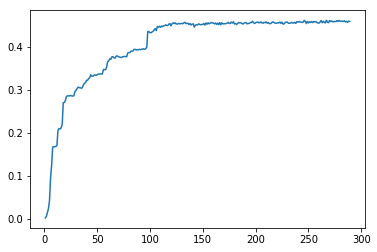

In [176]:
plt.plot(np.arange(1,290),a)

In [178]:
a.index(max(a))

266

### References
* <font color=#008000> [1] Matplotlib.org. (2019). Demo of the histogram (hist) function with a few features — Matplotlib 3.1.0 documentation. [online] Available at: https://matplotlib.org/gallery/statistics/histogram_features.html [Accessed 1 Jul. 2019].
* <font color=#008000> [Seaborn.pydata.org. (2019). seaborn.distplot — seaborn 0.9.0 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.distplot.html [Accessed 1 Jul. 2019].
* <font color=#008000> GeeksforGeeks. (2019). Python | Pandas Dataframe.duplicated() - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-duplicated/ [Accessed 1 Jul. 2019].
* <font color=#008000> Pandas.pydata.org. (2019). pandas.DataFrame.drop — pandas 0.24.2 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html [Accessed 1 Jul. 2019].
* <font color=#008000> Pandas.pydata.org. (2019). pandas.DataFrame.fillna — pandas 0.22.0 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html [Accessed 1 Jul. 2019].
* <font color=#008000> GeeksforGeeks. (2019). Python | Pandas dataframe.groupby() - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/ [Accessed 1 Jul. 2019].
